# Caso de Estudio: Clasificación de la Planta Iris

[Alan Badillo Salas](mailto:alan@nomadacode.com)

Etapas de Machine Learning:

1. Adquicisión de los datos (desde un CSV con `pandas`)
2. Inspección de los datos (ver muestras aleatorias, valores únicos, visualización, etc.)
3. Construcción del modelo de aprendizaje (Árobles de Decisión, Máquinas de Soporte Vectorial, Redes Neuronales)
4. Entrenar el modelo de aprendizaje (construir la matriz `X` y el vector `y`)
5. Evaluar el desempeño (métricas de exactitud)


## 1. Adquicisión de los datos (desde un CSV con `pandas`)

> PASO 1 - Descargar el CSV desde la url [https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv](https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv)

In [31]:
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"

> PASO 2 - Instalar la librería de `pandas` 
> 
> con el comando `pip install pandas`

In [32]:
# Nota: Lo recomendable es abrir una terminal del sistema y ejecutar
#       $ pip install pandas
! pip install pandas 

> PASO 3 - Importar pandas

In [33]:
import pandas as pd

> PASO 4 - Abrir el CSV directamente de la URL

In [34]:
# iris = pd.read_csv("/Users/<usuario>/Downloads/iris.csv")
iris = pd.read_csv(url)

iris # print(iris)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


## 2. Inspección de los datos (ver muestras aleatorias, valores únicos, visualización, etc.)

> PASO 1 - Mostrar los primeros 5 registros y los últimos 5

In [35]:
iris.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [36]:
iris.tail(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


> PASO 2 - Mostrar 5 muestras aleatorias

In [37]:
iris.sample(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
94,5.6,2.7,4.2,1.3,Versicolor
27,5.2,3.5,1.5,0.2,Setosa
99,5.7,2.8,4.1,1.3,Versicolor
145,6.7,3.0,5.2,2.3,Virginica
132,6.4,2.8,5.6,2.2,Virginica


> PASO 3 - Recuperar los valores únicos para la columna `variety`

In [38]:
iris["variety"].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

> PASO 4 - Agrupar el promedio de `sepal.length` para la columna `variety`

In [39]:
iris.groupby("variety")["sepal.length"].apply("mean")

variety
Setosa        5.006
Versicolor    5.936
Virginica     6.588
Name: sepal.length, dtype: float64

Podemos usar alternativamente otras agregaciones como contar cuántos registros hay

In [40]:
iris.groupby("variety")["sepal.length"].apply("count")

variety
Setosa        50
Versicolor    50
Virginica     50
Name: sepal.length, dtype: int64

O podemos encontrar el mínimo de cada `sepal.length` por `variety`

In [41]:
iris.groupby("variety")["sepal.length"].apply("min")

variety
Setosa        4.3
Versicolor    4.9
Virginica     4.9
Name: sepal.length, dtype: float64

O podemos encontrar el máximo de cada `sepal.length` por `variety`

In [42]:
iris.groupby("variety")["sepal.length"].apply("max")

variety
Setosa        5.8
Versicolor    7.0
Virginica     7.9
Name: sepal.length, dtype: float64

> Paso 5 - Hacer visualizaciones de datos

In [50]:
iris.groupby("variety").apply("max")

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,5.8,4.4,1.9,0.6
Versicolor,7.0,3.4,5.1,1.8
Virginica,7.9,3.8,6.9,2.5


Instalamos las librerías más utilizadas para visualización de datos:

In [43]:
# $ pip install matplotlib seaborn
! pip install matplotlib seaborn

*Histograma*

Representa las regiones de acumulaciones de valores para un 1-eje, dónde el eje horizontal representa el intervalo de nuestros valores (por ejemplo, desde el mínimo hasta el máximo para el `sepal.length`), y el eje vertical representaría cuántos valores caen en ese rango. Cada rango se conoce como un `bin`.

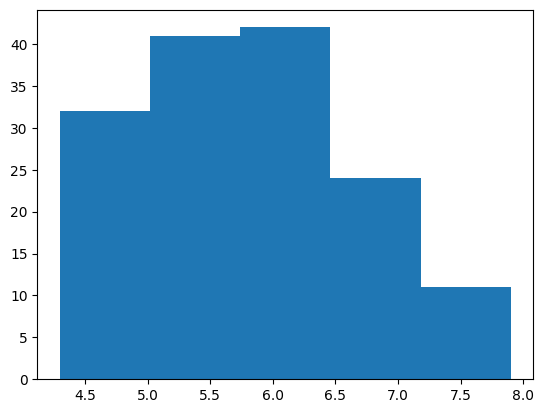

In [44]:
import matplotlib.pyplot as plt

plt.hist(iris["sepal.length"], bins=5)
plt.show()

Podemos calcular manualmente los valores del histograma

In [45]:
import numpy as np

np.histogram(iris["sepal.length"], bins=5)

(array([32, 41, 42, 24, 11]), array([4.3 , 5.02, 5.74, 6.46, 7.18, 7.9 ]))

*Correlación*

Representa dos ejes de análisis contrastados entre el horizontal y el vertical, indicando si hay una tendencia lineal (significaría que a mayor de uno mayor del otro `directa` o a mayor del uno menor del otro `inversa`)

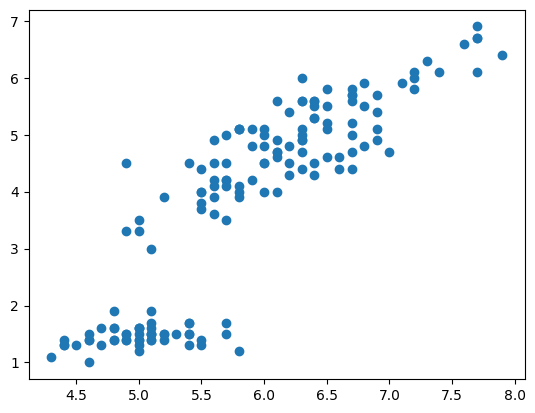

In [46]:
import matplotlib.pyplot as plt

plt.scatter(iris["sepal.length"], iris["petal.length"])
plt.show()

Podemos calcular manualmente la correlación

In [47]:
iris["sepal.length"].corr(iris["petal.length"])

0.8717537758865831

In [48]:
iris["sepal.length"].corr(iris["sepal.width"])

-0.11756978413300198

La gráfica en parejas nos muestra las correlaciones e histogramas columna-columna

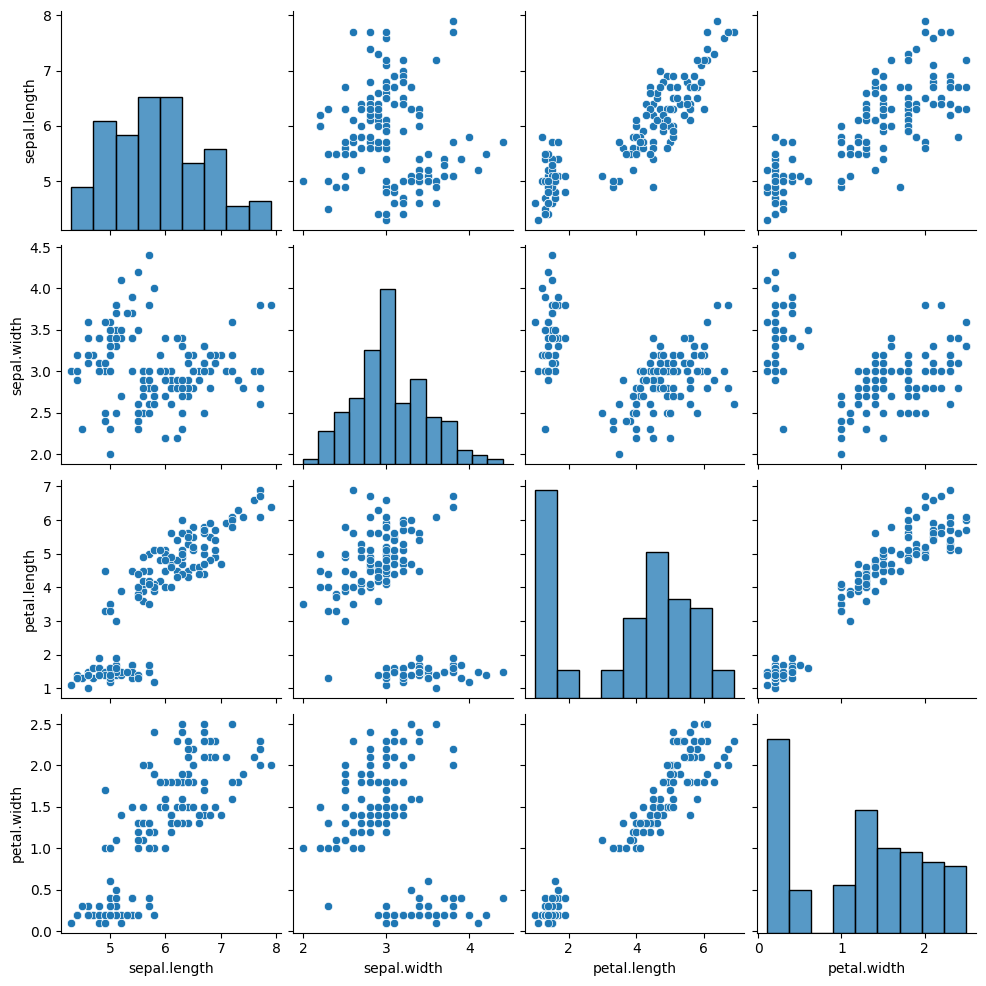

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(iris)
plt.show()

Podemos generar cajas de error para contrastar los datos

<Axes: >

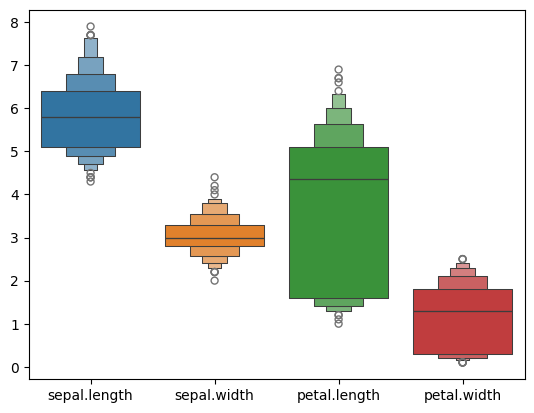

In [51]:
import seaborn

seaborn.boxenplot(iris)

In [52]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [53]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [54]:
iris_versicolor = iris[ iris["variety"] == 'Versicolor' ]

iris_versicolor

,sepal.length,sepal.width,petal.length,petal.width,variety
50,7.0,3.2,4.7,1.4,Versicolor
51,6.4,3.2,4.5,1.5,Versicolor
52,6.9,3.1,4.9,1.5,Versicolor
53,5.5,2.3,4.0,1.3,Versicolor
54,6.5,2.8,4.6,1.5,Versicolor
55,5.7,2.8,4.5,1.3,Versicolor
56,6.3,3.3,4.7,1.6,Versicolor
57,4.9,2.4,3.3,1.0,Versicolor
58,6.6,2.9,4.6,1.3,Versicolor
59,5.2,2.7,3.9,1.4,Versicolor


In [55]:
iris_setosa = iris[ iris["variety"] == 'Setosa' ]

iris_setosa

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [56]:
iris_virginica = iris[ iris["variety"] == 'Virginica' ]

iris_virginica

,sepal.length,sepal.width,petal.length,petal.width,variety
100,6.3,3.3,6.0,2.5,Virginica
101,5.8,2.7,5.1,1.9,Virginica
102,7.1,3.0,5.9,2.1,Virginica
103,6.3,2.9,5.6,1.8,Virginica
104,6.5,3.0,5.8,2.2,Virginica
105,7.6,3.0,6.6,2.1,Virginica
106,4.9,2.5,4.5,1.7,Virginica
107,7.3,2.9,6.3,1.8,Virginica
108,6.7,2.5,5.8,1.8,Virginica
109,7.2,3.6,6.1,2.5,Virginica


<Axes: >

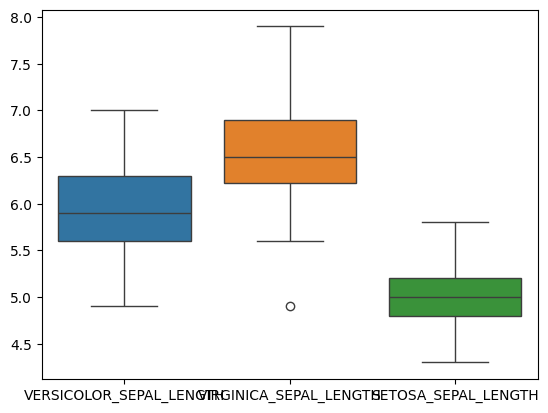

In [59]:
import seaborn

import pandas as pd

sepals = pd.DataFrame({
    "VERSICOLOR_SEPAL_LENGTH": iris_versicolor["sepal.length"],
    "VIRGINICA_SEPAL_LENGTH": iris_virginica["sepal.length"],
    "SETOSA_SEPAL_LENGTH": iris_setosa["sepal.length"]
})

seaborn.boxplot(sepals)

In [60]:
sepals.describe()

,VERSICOLOR_SEPAL_LENGTH,VIRGINICA_SEPAL_LENGTH,SETOSA_SEPAL_LENGTH
count,50.000000,50.00000,50.00000
mean,5.936000,6.58800,5.00600
std,0.516171,0.63588,0.35249
min,4.900000,4.90000,4.30000
25%,5.600000,6.22500,4.80000
50%,5.900000,6.50000,5.00000
75%,6.300000,6.90000,5.20000
max,7.000000,7.90000,5.80000


<Axes: >

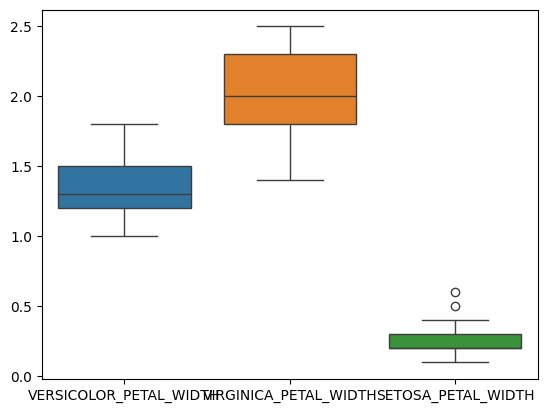

In [82]:
import seaborn

import pandas as pd

petals = pd.DataFrame({
    "VERSICOLOR_PETAL_WIDTH": iris_versicolor["petal.width"],
    "VIRGINICA_PETAL_WIDTH": iris_virginica["petal.width"],
    "SETOSA_PETAL_WIDTH": iris_setosa["petal.width"]
})

seaborn.boxplot(petals)

In [83]:
petals.describe()

,VERSICOLOR_PETAL_WIDTH,VIRGINICA_PETAL_WIDTH,SETOSA_PETAL_WIDTH
count,50.000000,50.00000,50.000000
mean,1.326000,2.02600,0.246000
std,0.197753,0.27465,0.105386
min,1.000000,1.40000,0.100000
25%,1.200000,1.80000,0.200000
50%,1.300000,2.00000,0.200000
75%,1.500000,2.30000,0.300000
max,1.800000,2.50000,0.600000


## 3. Construcción del modelo de aprendizaje (Árobles de Decisión, Máquinas de Soporte Vectorial, Redes Neuronales)

> PASO 1 - Instalar el paquete scikit-learn

In [61]:
! pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/db/0d/1f6d2cd52c886707b00ddb7ed2504cbf10903a60a7bebcd71f0f77d53505/scikit_learn-1.3.1-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/50/8b/2057417a07a6fee8ed8be40e37bac4a502cae4cf44468a02962bbe81b8af/scipy-1.11.3-cp311-cp311-macosx_12_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.4/165.4 kB 766.8 kB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

> PASO 2 - Importar la librería en la que se encuentra el modelo de aprendizaje

In [62]:
from sklearn.tree import DecisionTreeClassifier

> Paso 3 - Construir el modelo de aprendizaje basado en el tipo de aprendizaje

In [94]:
clf = DecisionTreeClassifier(criterion="entropy")
# criterion="gini"
# criterion="entropy"
# criterion="log_loss"

## 4. Entrenar el modelo de aprendizaje (construir la matriz `X` y el vector `y`)

> PASO 1 - Debemos tener una matriz numérica de características

Seleccionar las columnas que contienen las características numéricas

In [64]:
iris[ ["sepal.length", "sepal.width", "petal.length", "petal.width"] ]

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [68]:
X = iris[ ["sepal.length", "sepal.width", "petal.length", "petal.width"] ].values

X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Cuando recuperamos los valores de un *DataFrame* obtenemos automáticamente un arreglo n-dimensional de **Numpy** que representa la matriz de características.

In [71]:
print(type(iris))

<class 'pandas.core.frame.DataFrame'>


In [69]:
print(type(X))

<class 'numpy.ndarray'>


In [74]:
print(type(iris["variety"]))

<class 'pandas.core.series.Series'>


In [73]:
y = iris["variety"].values

y

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolo

In [75]:
print(type(y))

<class 'numpy.ndarray'>


In [76]:
print(y)

['Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'V

In [95]:
clf.fit(X, y)

clf

DecisionTreeClassifier(criterion='entropy')

In [96]:
from sklearn import tree

print(tree.export_text(clf))

|--- feature_2 <= 2.45
|   |--- class: Setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: Versicolor
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: Virginica
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: Virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: Versicolor
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: Virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Virginica


## 5. Evaluar el desempeño (métricas de exactitud)

> PASO 1 - Importar la función de métricas de desempeño por puntuación cruzada

In [84]:
from sklearn.model_selection import cross_val_score

> PASO 2 - Utilizar la función para evaluar el desempeño de un modelo de aprendizaje según las métricas de evaluación

In [97]:
scores = cross_val_score(clf, X, y, cv=10, scoring="accuracy")

scores

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

In [98]:
scores.mean()

0.96

Otros modelos de clasificación

In [99]:
from sklearn.svm import SVC

clf = SVC()

scores = cross_val_score(clf, X, y, cv=10, scoring="accuracy")

scores.mean()

0.9733333333333334

In [101]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()

scores = cross_val_score(clf, X, y, cv=10, scoring="accuracy")

scores.mean()

/Users/dragonnomada/Desktop/thincrs-machine-learning-2023-oct/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/dragonnomada/Desktop/thincrs-machine-learning-2023-oct/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/dragonnomada/Desktop/thincrs-machine-learning-2023-oct/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/dragonnomada/Desktop/thincrs-machine-learning-2023-oct/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:

0.9733333333333334

Evaluación de múltiples clasificadores

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier(criterion="entropy")
clf3 = DecisionTreeClassifier(criterion="log_loss")
clf4 = SVC()
clf5 = SVC(kernel='linear')
clf6 = SVC(kernel='poly', degree=2)
clf7 = SVC(kernel='poly', degree=5)
clf8 = MLPClassifier()
clf9 = MLPClassifier(hidden_layer_sizes=(100, 100, 100))

print("MLP", clf8.hidden_layer_sizes)

for name, clf in [('TREE 1', clf1), ('TREE 2', clf2), ('TREE 3', clf3), ('SVC RBF', clf4), ('SVC LINEAR', clf5), ('SVC POLY 2', clf6), ('SVC POLY 5', clf7), ('MLP', clf8), ('MLP (200,)', clf9)]:
    scores = cross_val_score(clf, X, y, cv=10, scoring="accuracy")
    print("{}: {:.2f}%".format(name, scores.mean() * 100))

MLP (100,)
TREE 1: 96.00%
TREE 2: 96.00%
TREE 3: 96.00%
SVC RBF: 97.33%
SVC LINEAR: 97.33%
SVC POLY 2: 97.33%
SVC POLY 5: 97.33%


/Users/dragonnomada/Desktop/thincrs-machine-learning-2023-oct/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/dragonnomada/Desktop/thincrs-machine-learning-2023-oct/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/dragonnomada/Desktop/thincrs-machine-learning-2023-oct/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/dragonnomada/Desktop/thincrs-machine-learning-2023-oct/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:

MLP: 97.33%


/Users/dragonnomada/Desktop/thincrs-machine-learning-2023-oct/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/dragonnomada/Desktop/thincrs-machine-learning-2023-oct/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/dragonnomada/Desktop/thincrs-machine-learning-2023-oct/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/dragonnomada/Desktop/thincrs-machine-learning-2023-oct/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:

MLP (200,): 98.00%


/Users/dragonnomada/Desktop/thincrs-machine-learning-2023-oct/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
